# Exploring Random Forest in python
Code source : 
https://www.dataquest.io/blog/introduction-to-ensembles/
Date : Republic and Democratic Donations data set


In [43]:
cd C:\Users\Ramesh Narayanan\Python

C:\Users\Ramesh Narayanan\Python


In [5]:
pwd

'C:\\Users\\Ramesh Narayanan\\Python'

# Importing Necessary packages, and loading the data

In [44]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Import data
# Always good to set a seed for reproducibility
df = pd.read_csv('input.csv')


In [45]:
### Training and test set
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

def get_train_test(test_size=0.95):
    """Split Data into train and test sets."""
    y = 1 * (df.cand_pty_affiliation == "REP")
    X = df.drop(["cand_pty_affiliation"], axis=1)
    X = pd.get_dummies(X, sparse=True)
    X.drop(X.columns[X.std() == 0], axis=1, inplace=True)
    return train_test_split(X, y, test_size=test_size, random_state=9)

xtrain, xtest, ytrain, ytest = get_train_test()

# A look at the data
df.head()

,cand_pty_affiliation,cand_office_st,cand_office,cand_status,rpt_tp,transaction_tp,entity_tp,state,classification,cycle,transaction_amt
0,REP,US,P,C,Q3,15,IND,NY,Engineer,2016.0,500.0
1,DEM,US,P,C,M5,15E,IND,OR,Math-Stat,2016.0,50.0
2,DEM,US,P,C,M3,15,IND,TX,Scientist,2008.0,250.0
3,DEM,US,P,C,Q2,15E,IND,IN,Math-Stat,2016.0,250.0
4,REP,US,P,C,12G,15,IND,MA,Engineer,2016.0,184.0


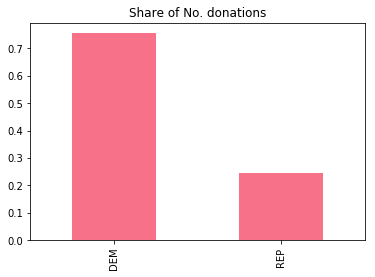

In [46]:
#Visualize the share of donations from both the parties
df.cand_pty_affiliation.value_counts(normalize=True).plot(
    kind="bar", title="Share of No. donations")
plt.show()

# MODEL EVALUATION

In [47]:
#Testing the model on a decision tree
t1 = DecisionTreeClassifier(max_depth=1, random_state=9)
t1.fit(xtrain, ytrain)
p = t1.predict_proba(xtest)[:, 1]

print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))

Decision tree ROC-AUC score: 0.672


In [48]:
#Repeat the decision tree with 3 levels of decisions
#Max_depth = 3 implies that there are 3 layers 
t2 = DecisionTreeClassifier(max_depth=3, random_state=9)
t2.fit(xtrain, ytrain)
p = t2.predict_proba(xtest)[:, 1]

print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))

Decision tree ROC-AUC score: 0.761


In [49]:
# Repeat the decision tree, by fixing the number of decisions like before. But increase the width - expand the decision trees
#Force the decision tree to look for other patterns by removing one columns
#Remove the transaction amount column, so that the decisions now will be based on other parameters except this column
drop = ["transaction_amt"]

xtrain_slim = xtrain.drop(drop, 1)
xtest_slim = xtest.drop(drop, 1)

t3 = DecisionTreeClassifier(max_depth=3, random_state=9)
t3.fit(xtrain_slim, ytrain)
p = t3.predict_proba(xtest_slim)[:, 1]

print("Decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))

Decision tree ROC-AUC score: 0.749


In [ ]:
#This decision tree is not better than the previous one, but its created on different set of decisions

# Ensemble techniques

In [50]:
#The models should not make correlated predicitons
#If both the models erros are correlated, then ensembling might not work
#If both the models are making very good preditcions , then ensembling might not work since they already have the best hypothesis
#When combined, they might fail at the same datapoints

p1 = t2.predict_proba(xtest)[:, 1]
p2 = t3.predict_proba(xtest_slim)[:, 1]

pd.DataFrame({"full_data": p1,
              "red_data": p2}).corr()

,full_data,red_data
full_data,1.000000,0.642623
red_data,0.642623,1.000000


In [51]:
#Highly correlated errors make poor ensembles
#Though there is some correlation, there is still room for improvement
#Let the first ensemble be an average of the two decision trees with 3 layers
p1 = t2.predict_proba(xtest)[:, 1]
p2 = t3.predict_proba(xtest_slim)[:, 1]
p = np.mean([p1, p2], axis=0)
print("Average of decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))

Average of decision tree ROC-AUC score: 0.801


The accuracy has improved slightly. But if we were to use several decision trees by selecting diverse features,the accuracy
can be further improved

# Random Forest - Ensemble of Decision Trees

In [52]:
#Using random forest package, we create an ensemble of decision trees
# The accuracy of the model should be higher than the decision tree
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=10,
    max_features=3,
    random_state=9
)

rf.fit(xtrain, ytrain)
p = rf.predict_proba(xtest)[:, 1]
print("Average of decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p))

Average of decision tree ROC-AUC score: 0.845


The accuracy of the model has increased to a considerable extent.

In [ ]:
Since there was correaltion and its always difficult to get the outliers right, we didntsee a great improvement.